In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

# load the data
ts_df = pd.read_csv('data/TS.csv', index_col=0, parse_dates=[0], date_parser=parser)

In [3]:
# display first five rows
ts_df.head()

,Sales
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36


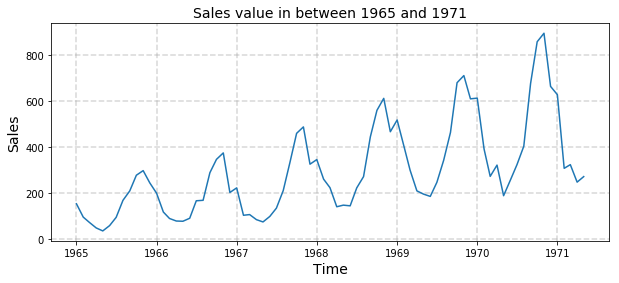

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

ax.plot(ts_df.Sales)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
ax.set_title('Sales value in between 1965 and 1971', fontsize=14)
ax.grid(True, lw=1.5, ls='--', alpha=0.5)

In [5]:
# decomposes the sales data as a multiplicative model
result = seasonal_decompose(ts_df, model='multiplicative')

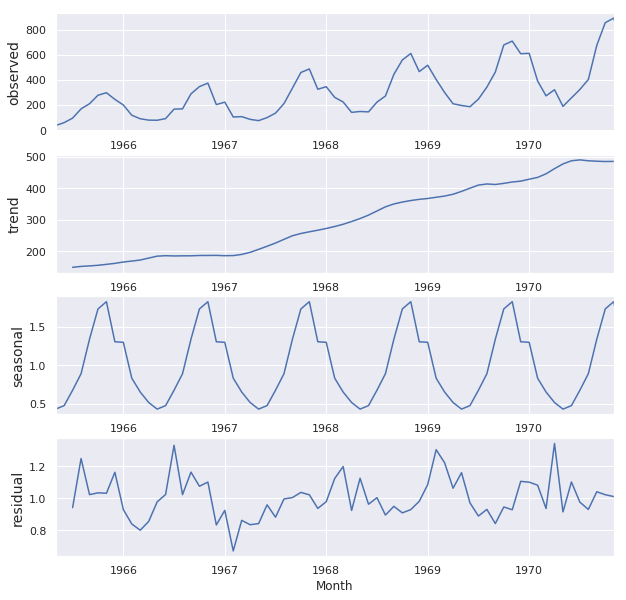

In [6]:
sns.set()

xmin = ts_df.idxmin()[0]
xmax = ts_df.idxmax()[0]

fig, ax = plt.subplots(4,1, figsize=(10,10))

result.observed.plot(ax=ax[0])
result.trend.plot(ax=ax[1])
result.seasonal.plot(ax=ax[2])
result.resid.plot(ax=ax[3])

ax[0].set_ylabel('observed', fontsize=14)
ax[1].set_ylabel('trend', fontsize=14)
ax[2].set_ylabel('seasonal', fontsize=14)
ax[3].set_ylabel('residual', fontsize=14)

ax[0].set_xlim(xmin, xmax)
ax[1].set_xlim(xmin, xmax)
ax[2].set_xlim(xmin, xmax)
ax[3].set_xlim(xmin, xmax)

ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
ax[2].legend().set_visible(False)
ax[3].legend().set_visible(False)

### ARIMA(p,d,q) Model

In [7]:
X = ts_df['Sales'].astype(float).values
test_size = int(len(X) * 0.80)  # 70 % 
# Training set
train = X[:test_size]
# testing set
test  = X[test_size:len(X)]

print("Total Samples    : %d" % len(X))
print("Training Samples : %d" % len(train))
print("Testing Samples  : %d" % len(test))

Total Samples    : 77
Training Samples : 61
Testing Samples  : 16


In [8]:
sales_history = [x for x in train ]
preds = []

# order=(p,d,q)
p = 3    # AR parameters/Lags
q = 2    # Differencing order
d = 0    # MA parameters

#arima_model = ARIMA(train, order=(p,q,d))
#arima_model_fit = arima_model.fit()

for i in range(len(test)):
    # initiate ARIMA model
    arima_model = ARIMA(sales_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast sales value
    output = arima_model_fit.forecast()[0]
    # append the test sales value to a sales history data
    sales_history.append(test[i])  
    # append the forcasted sales value to a prediction list
    preds.append(output)

Mean Squared Error : 28683.81


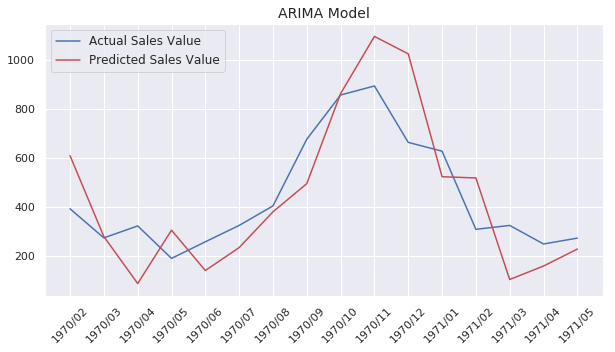

In [9]:
print("Mean Squared Error : %.2f" % mean_squared_error(test, preds))

fix, ax = plt.subplots(1,1, figsize=(10,5))
tick_labels = list(ts_df.iloc[test_size:].index.strftime("%Y/%m").values)

ax.set_title("ARIMA Model", fontsize=14)
ax.plot(test, label='Actual Sales Value')
ax.plot(preds, color='r', label='Predicted Sales Value')
ax.set_xticks(np.arange(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation = 45)              
ax.legend(loc='upper left', fontsize=12)

In [10]:
# Forecasting sales value for next 1 year

sales_history = [x for x in X]
preds = []
forecasting_months = 12

p = 9
q = 2
d = 0

for i in range(forecasting_months):
    # initiate ARIMA model
    arima_model = ARIMA(sales_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast sales value
    output = arima_model_fit.forecast()[0]
    # append the forecasted sales value to a sales history data
    sales_history.append(output)  
    # append the forcasted sales value to a prediction list
    preds.append(output)

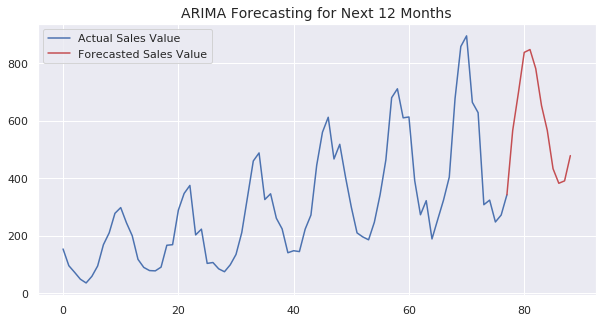

In [11]:
start = len(X)
end = start + int(forecasting_months)
history = pd.Series(sales_history)

plt.figure(figsize=(10,5))
plt.title("ARIMA Forecasting for Next 12 Months", fontsize=14)
plt.plot(history[0:start+1], label='Actual Sales Value')
plt.plot(history[start:end], color='r', label='Forecasted Sales Value')
plt.legend()